In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


# Metrics for classification
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,

    confusion_matrix,
    classification_report
)

import pickle
import warnings

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [2]:
data_raw = pd.read_csv("adult_income.csv")
data = data_raw.copy()

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
data.columns = data.columns.str.strip()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.shape

(32561, 15)

In [9]:
data.duplicated().sum()

np.int64(24)

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(32537, 15)

In [11]:
# data.isnull().sum()

In [12]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [13]:
# in workclass, occupation, native.country replacing ? just for better understanding.

In [14]:
data['workclass'] = data['workclass'].replace({'?': 'other'})

In [15]:
data['occupation'] = data['occupation'].replace({'?': 'other'})

In [16]:
data['native.country'] = data['native.country'].replace({'?': 'other'})

In [17]:
data['native.country'].unique()

array(['United-States', 'other', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [18]:
data = data.drop(['education', 'fnlwgt'], axis=1)

In [19]:
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,other,9,Widowed,other,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,other,10,Widowed,other,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [20]:
partial_num_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
partial_cat_cols = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

In [21]:
data[partial_num_cols].head()

,age,education.num,capital.gain,capital.loss,hours.per.week
0,90,9,0,4356,40
1,82,9,0,4356,18
2,66,10,0,4356,40
3,54,4,0,3900,40
4,41,10,0,3900,40


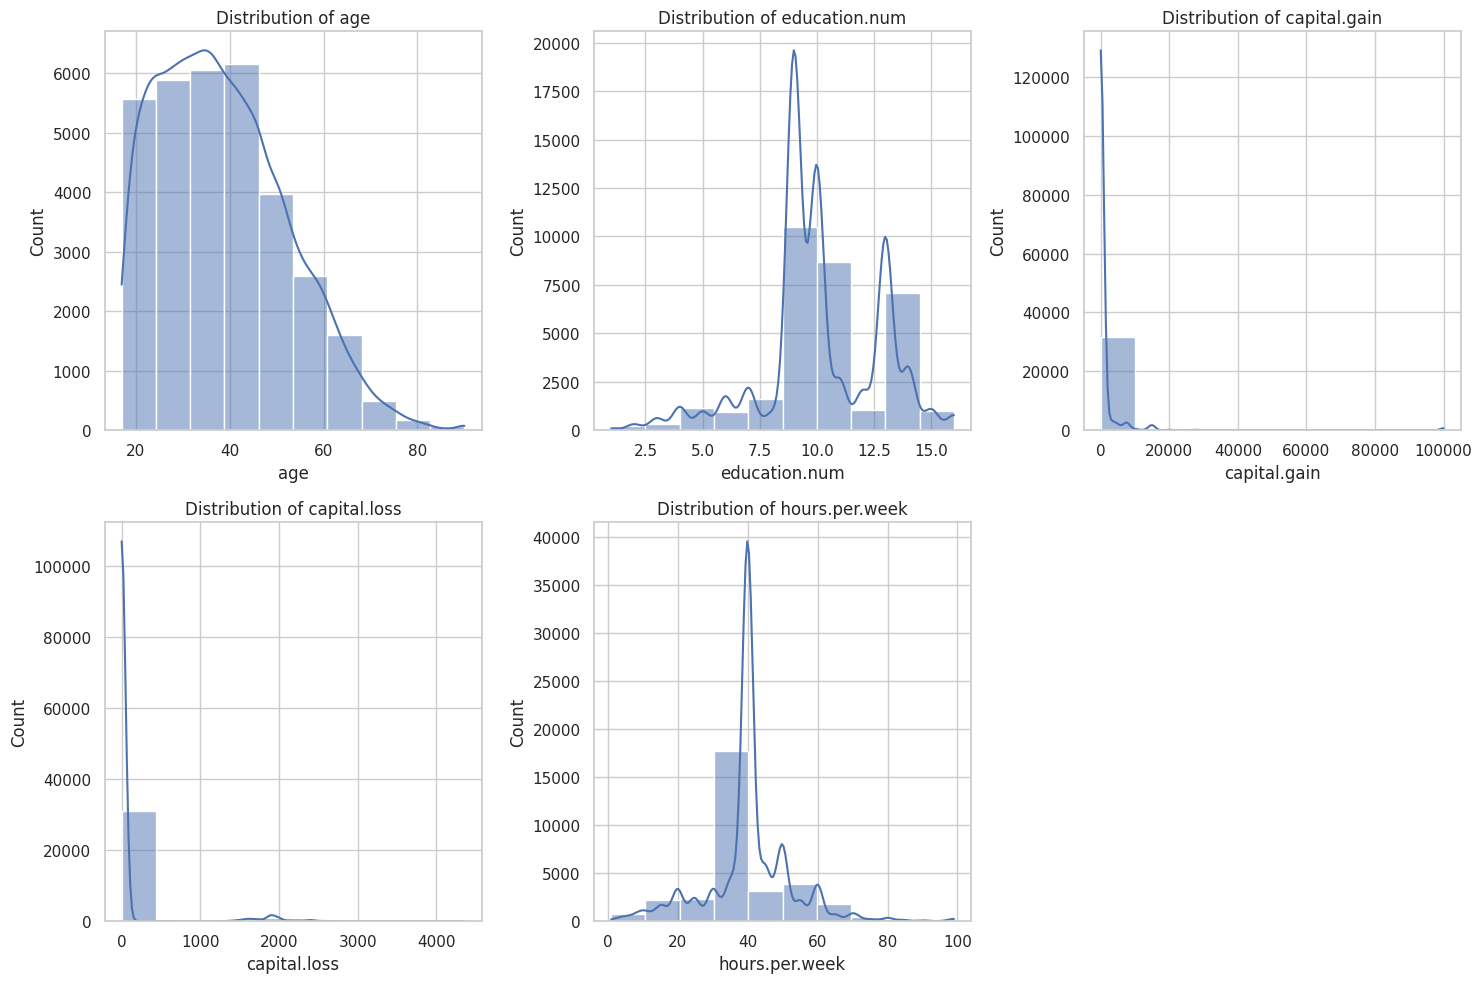

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, column in enumerate(partial_num_cols, 1):  # start index at 1 for subplot
    plt.subplot(2, 3, i)  # 1 row, 2 columns of plots
    sns.histplot(data[column], kde=True, bins=10)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

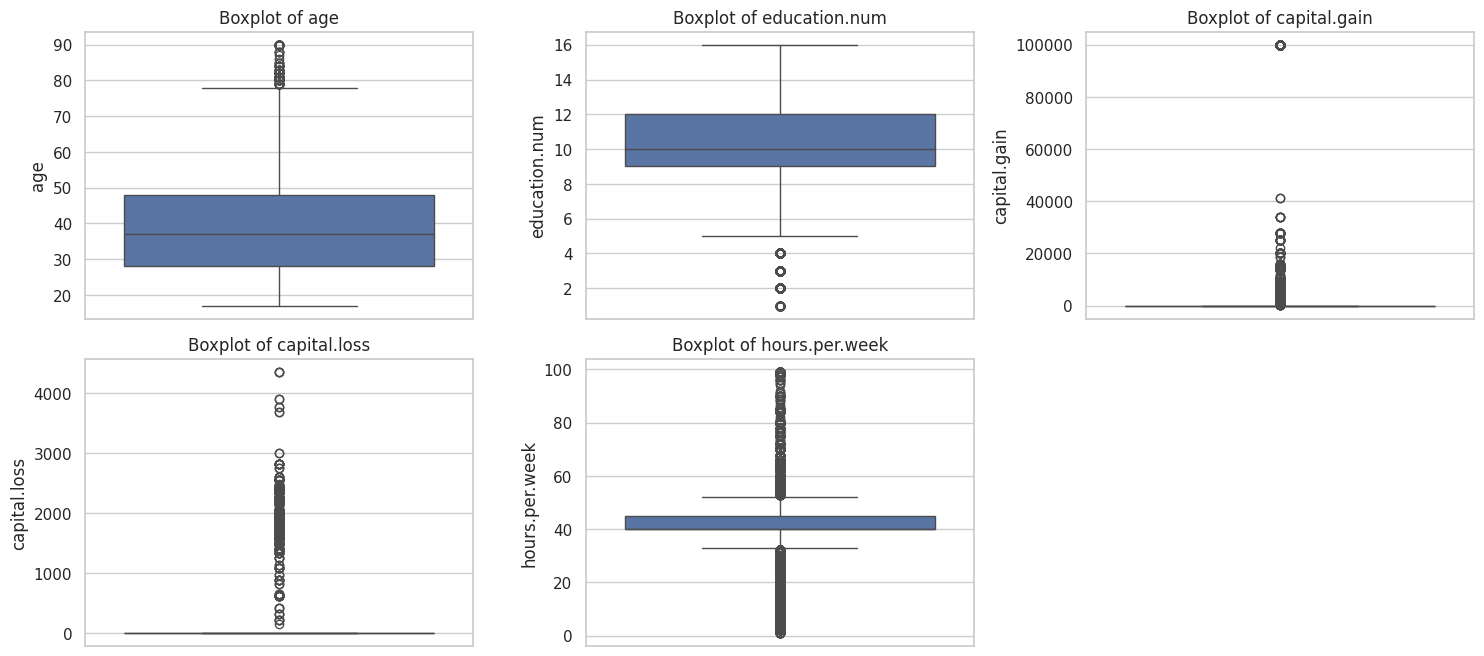

In [23]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(data[partial_num_cols], 1):
  plt.subplot(3, 3, i)
  sns.boxplot(data[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [24]:
# Count total rows
total = len(data)

# Count rows with age > 80
above_80 = (data['age'] > 75).sum()

# Calculate percentage
percentage_above_80 = (above_80 / total) * 100

print(f"Total records: {total}")
print(f"Ages > 80: {above_80}")
print(f"Percentage: {percentage_above_80:.2f}%")


Total records: 32537
Ages > 80: 240
Percentage: 0.74%


In [25]:
# clipping age to avoid outliers
data['age'] = data['age'].clip(upper=75)

In [26]:
# clipping hours to handle outliers
data['hours.per.week'] = data['hours.per.week'].clip(lower=10, upper=70)

In [27]:
data['hours.per.week'].unique()

array([40, 18, 45, 20, 60, 35, 55, 70, 50, 42, 25, 32, 48, 15, 52, 39, 10,
       65, 12, 67, 30, 26, 36, 38, 62, 44, 28, 59, 24, 57, 34, 37, 46, 56,
       41, 43, 63, 47, 68, 54, 16, 33, 23, 22, 64, 51, 19, 58, 53, 66, 21,
       13, 27, 11, 14, 31, 49, 17, 29, 61])

In [28]:
for col in ['capital.gain','capital.loss']:
    s = data[col]
    print(col)
    print("  n = ", s.shape[0])
    print("  zeros = ", (s==0).sum(), "({:.2%})".format((s==0).mean()))
    print("  unique values = ", s.nunique())
    print("  min, 25%, 50%, 75%, 99%, max:")
    print("   ", np.percentile(s, [0,25,50,75,99,100]))
    print("  mean, median, std:", s.mean(), s.median(), s.std())
    print()

capital.gain
  n =  32537
  zeros =  29825 (91.66%)
  unique values =  119
  min, 25%, 50%, 75%, 99%, max:
    [    0.     0.     0.     0. 15024. 99999.]
  mean, median, std: 1078.4437409718166 0.0 7387.957424187157

capital.loss
  n =  32537
  zeros =  31018 (95.33%)
  unique values =  92
  min, 25%, 50%, 75%, 99%, max:
    [   0.    0.    0.    0. 1980. 4356.]
  mean, median, std: 87.36822694163568 0.0 403.1018330630932



In [29]:
def capital_loss_category(x):
    if x > 0:
        return 'loss'
    else:
        return 'not loss'

data['capital.loss'] = data['capital.loss'].apply(capital_loss_category)
print(data['capital.loss'].value_counts())

capital.loss
not loss    31018
loss         1519
Name: count, dtype: int64


In [30]:
def capital_gain_category(x):
    if x > 0:
        return 'gain'
    else:
        return 'not gain'

data['capital.gain'] = data['capital.gain'].apply(capital_gain_category)
print(data['capital.gain'].value_counts())


capital.gain
not gain    29825
gain         2712
Name: count, dtype: int64


In [31]:
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,75,other,9,Widowed,other,Not-in-family,White,Female,not gain,loss,40,United-States,<=50K
1,75,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,not gain,loss,18,United-States,<=50K
2,66,other,10,Widowed,other,Unmarried,Black,Female,not gain,loss,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,not gain,loss,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,not gain,loss,40,United-States,<=50K


In [32]:
# mapping target here, to use it in heapmap...bcz heatmap works on number not str
target_map = {'<=50K': 0, '>50K': 1}
data['income'] = data['income'].map(target_map)

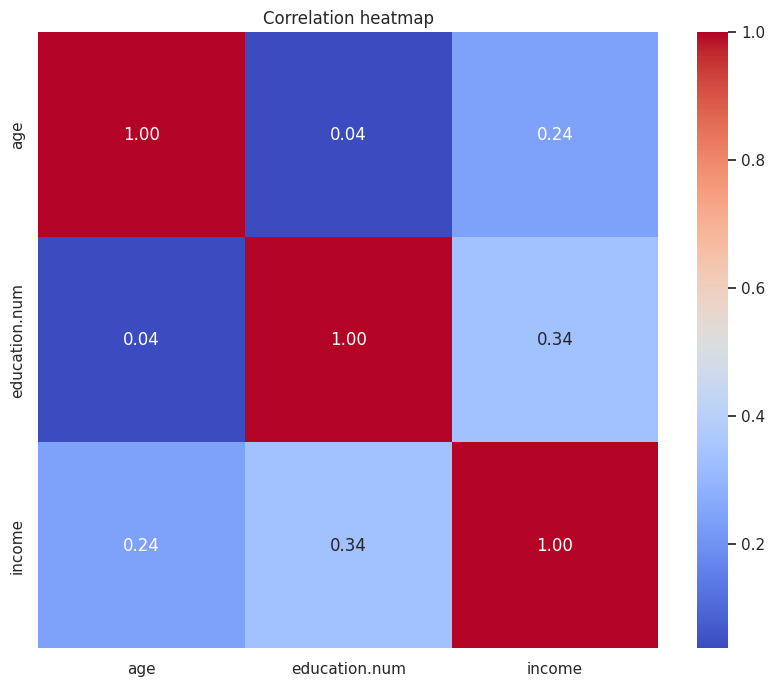

In [33]:
plt.figure(figsize=(10, 8))

sns.heatmap(data[['age', 'education.num', 'income']].corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation heatmap")
plt.show()

<!-- categorical -->


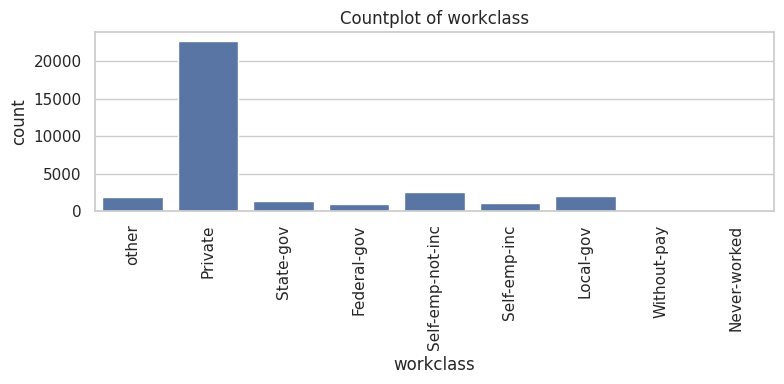

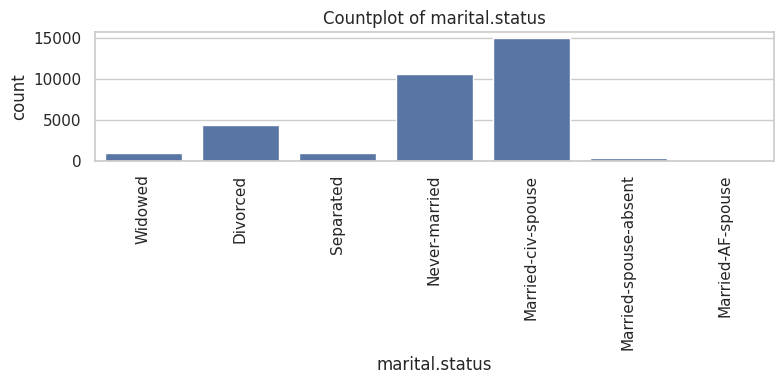

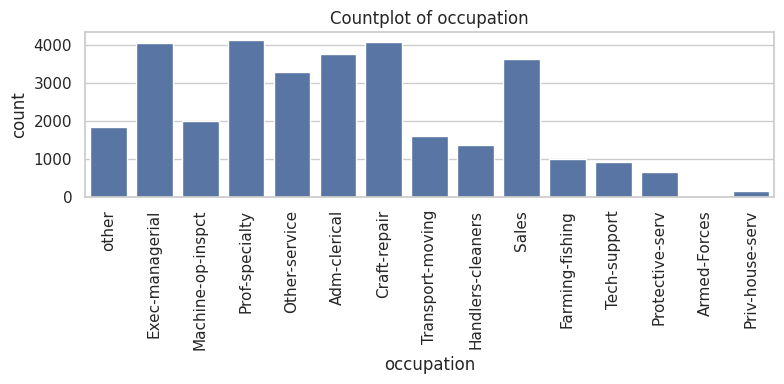

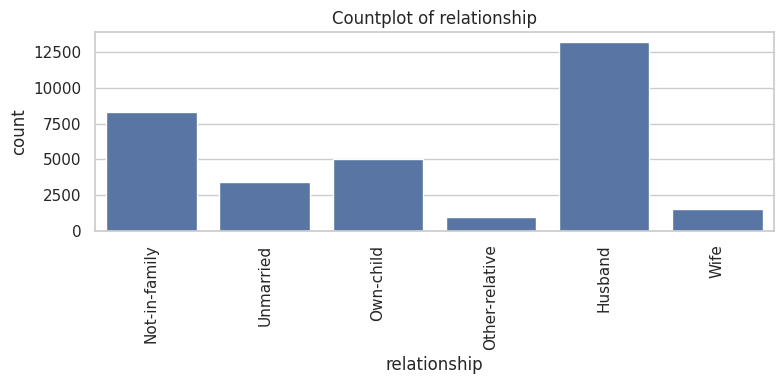

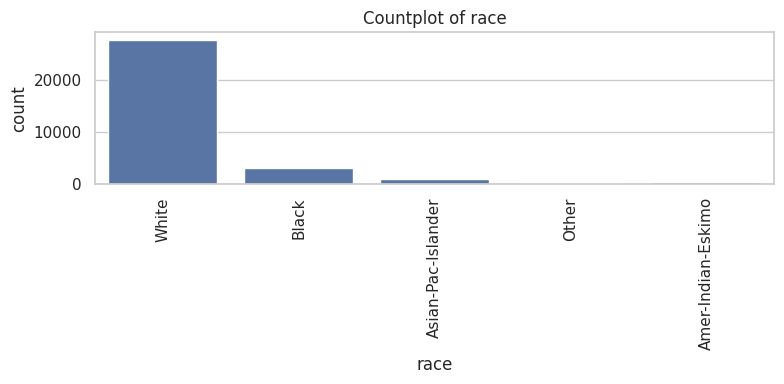

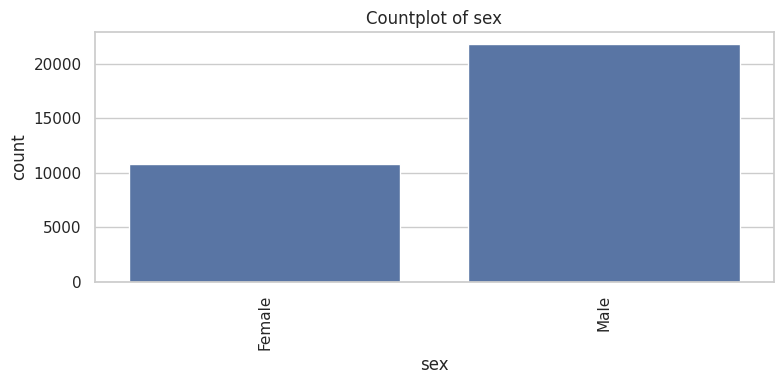

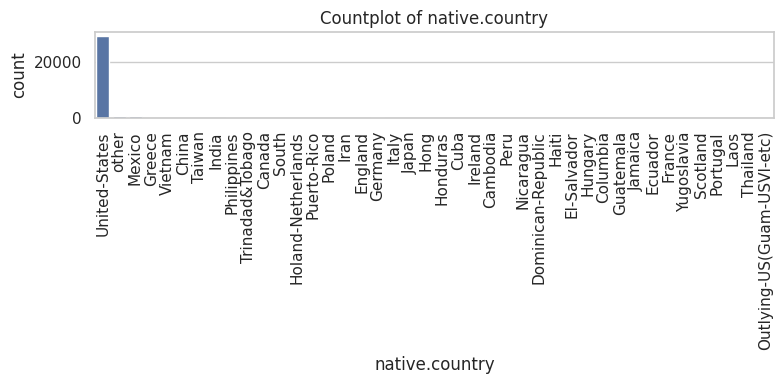

In [34]:
for col in data[partial_cat_cols]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

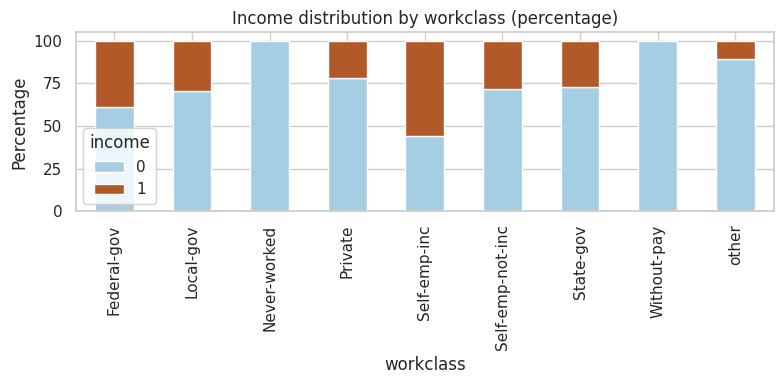

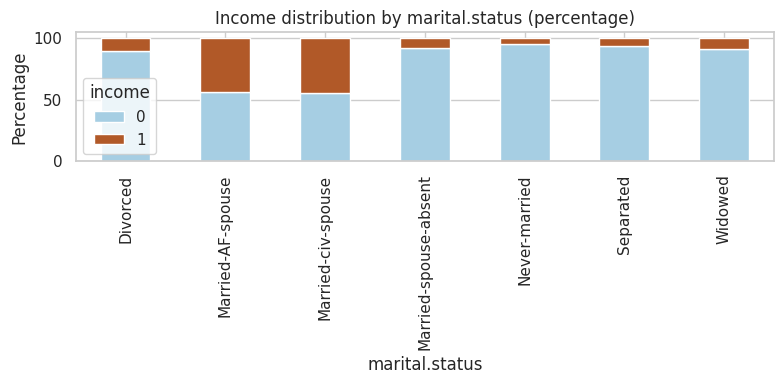

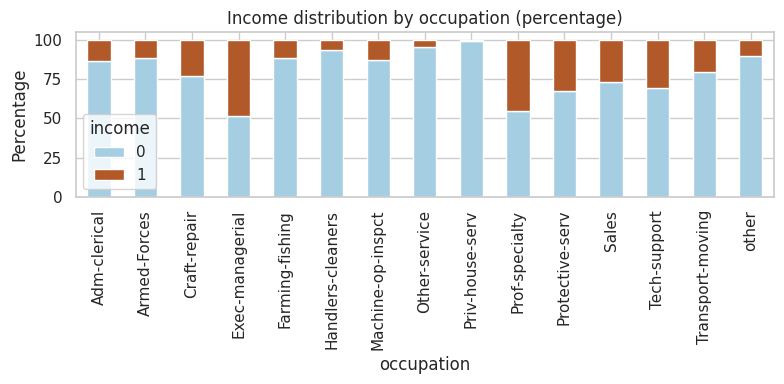

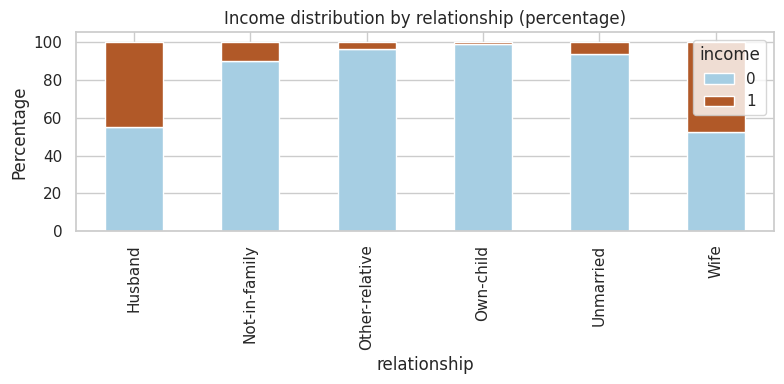

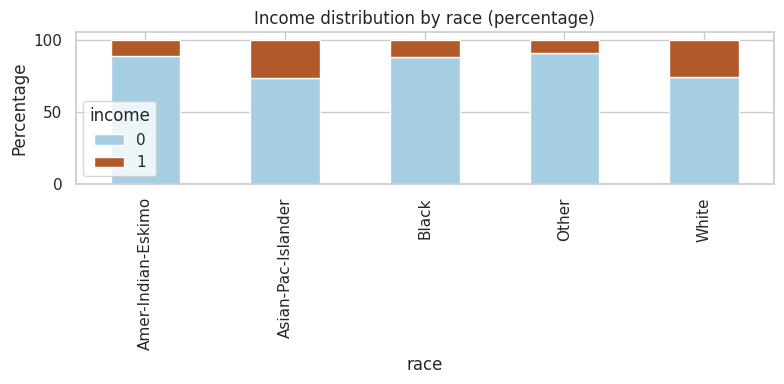

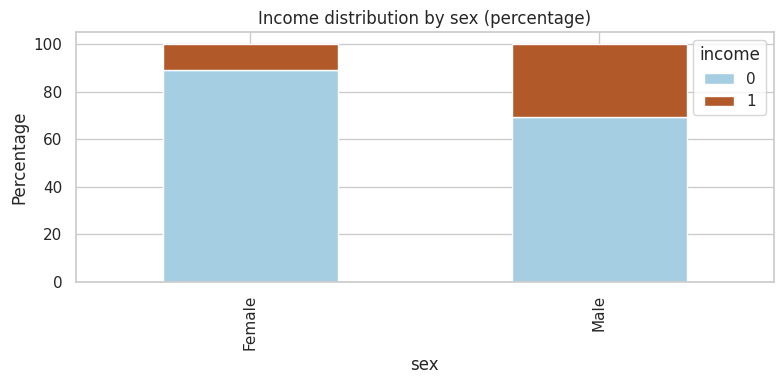

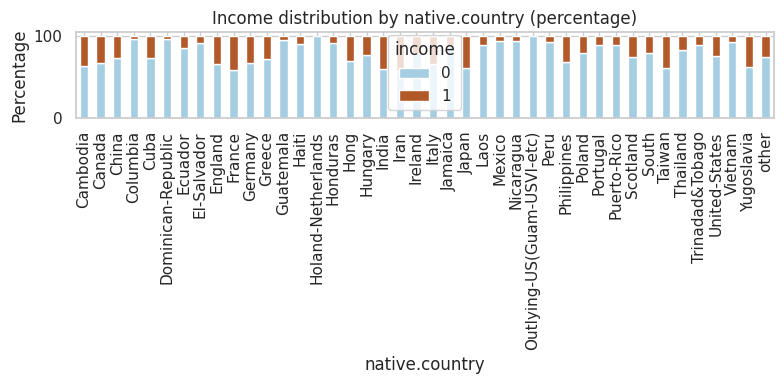

In [36]:
for col in partial_cat_cols:
    plt.figure(figsize=(8, 4))
    y = data['income']
    # Create crosstab with percentages
    ct = pd.crosstab(data[col], y, normalize='index') * 100

    # Plot stacked bar
    ct.plot(kind='bar', stacked=True, colormap="Paired", ax=plt.gca())

    plt.ylabel("Percentage")
    plt.title(f"Income distribution by {col} (percentage)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [37]:
# binning with respect to countplot stack with hue

In [38]:
def simplify_workclass(x):
    x = x.strip()   # remove spaces + make lowercase
    unemployed = ['without-pay', 'never-worked']
    employed = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov','Federal-gov']
    self_employed = ['Self-emp-inc']
    if x in unemployed:
        return 'Unemployed'
    elif x in employed:
        return 'Employed'
    elif x in self_employed:
        return 'self_employed'
    else:
        return 'unknown'

data['workclass'] = data['workclass'].apply(simplify_workclass)

In [39]:
def simplify_marital(x):
    if x in ['Married-civ-spouse', 'Married-AF-spouse']:
        return 'Married'
    elif x == ['Never-married', 'Separated']:
        return 'Never-married/single'
    elif x in ['Divorced', 'Widowed', 'Married-spouse-absent']:
        return 'Previously-married'
    else:
        return 'Unknown'

data['marital.status'] = data['marital.status'].apply(simplify_marital)

print(data['marital.status'].value_counts(normalize=True) * 100)

marital.status
Married               46.079848
Unknown               35.934475
Previously-married    17.985678
Name: proportion, dtype: float64


In [40]:
def simplify_occupation(x):
    white_collar = ['Exec-managerial', 'Prof-specialty', 'Adm-clerical', 'Sales', 'Tech-support']
    blue_collar  = ['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing']
    service      = ['Other-service', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces']

    if x in white_collar:
        return 'White-collar'
    elif x in blue_collar:
        return 'Blue-collar'
    elif x in service:
        return 'Service'
    else:
        return 'unknown'

data['occupation'] = data['occupation'].apply(simplify_occupation)

# other has only armed forces has only 9 values


In [41]:
def simplify_relationship(value):

    if value in ['Husband', 'Wife']:
        return 'Spouse'
    elif value in ['Unmarried', 'Not-in-family']:
        return 'Single/Unmarried'
    elif value in ['Own-child', 'Other-relative']:
        return 'Dependent'
    else:
        return value  # leave unchanged if not in rules

data['relationship'] = data['relationship'].apply(simplify_relationship)

In [42]:
def simplify_race(x):

    if x in ['White', 'Asian-Pac-Islander']:
        return 'White'
    elif x == ['Black', 'Amer-Indian-Eskimo']:
        return 'Black'
    else:
        return 'other'

data['race'] = data['race'].apply(simplify_race)


In [43]:
def simplify_native_country(x):
    if x == 'United-States':
        return 'United-States'
    elif x == '?' or x == 'other':
        return 'unknown'
    else:
        return 'Others'

data['native.country'] = data['native.country'].apply(simplify_native_country)
print(data['native.country'].value_counts())

native.country
United-States    29153
Others            2802
unknown            582
Name: count, dtype: int64


In [44]:
ct = pd.crosstab(data['workclass'], data['income'])

# Convert to percentages (row-wise)
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

print("Counts:\n", ct)
print(f"\nPercentages:\n {ct_percent}%")

Counts:
 income             0     1
workclass                 
Employed       22538  7026
self_employed    494   622
unknown         1666   191

Percentages:
 income                 0          1
workclass                          
Employed       76.234610  23.765390
self_employed  44.265233  55.734767
unknown        89.714593  10.285407%


In [45]:
data[partial_cat_cols].columns

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')

In [46]:
data[partial_num_cols].columns

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [47]:
data[partial_cat_cols].columns


Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')

In [48]:
data.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [49]:
num_cols = ['age', 'education.num', 'hours.per.week']
cat_cols = ['workclass', 'marital.status', 'occupation',
'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'native.country']

In [50]:
X = data.drop('income', axis = 1)
Y = data['income']

In [51]:
nominal = ['workclass', 'native.country', 'occupation', 'relationship', 'race', 'marital.status']
binary = ['sex', 'capital.gain', 'capital.loss']


In [52]:
sex_map = {'Female':0, 'Male':1}
X['sex'] = X['sex'].map(sex_map)

In [53]:
gain_map = {'not gain':0, 'gain':1}
X['capital.gain'] = X['capital.gain'].map(gain_map)

In [54]:
loss_map = {'not loss':0, 'loss':1}
X['capital.loss'] = X['capital.loss'].map(loss_map)

In [55]:
encoders = {}
encoders['sex'] = sex_map
encoders['capital.gain'] = gain_map
encoders['capital.loss'] = loss_map
encoders['income'] = target_map


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [57]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [58]:
# Fit
one_hot_encoding = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
one_hot_fit = one_hot_encoding.fit(X_train[nominal])

# Transform
train_encoded_array = one_hot_fit.transform(X_train[nominal])
test_encoded_array = one_hot_fit.transform(X_test[nominal])

# DataFrame
train_encoded_df = pd.DataFrame(train_encoded_array,
                                columns=one_hot_fit.get_feature_names_out(nominal),
                                index=X_train.index)
test_encoded_df = pd.DataFrame(test_encoded_array,
                               columns=one_hot_fit.get_feature_names_out(nominal),
                               index=X_test.index)

# Drop original columns
X_train = X_train.drop(columns=nominal)
X_test = X_test.drop(columns=nominal)

# Concatenate encoded versions
X_train = pd.concat([X_train, train_encoded_df], axis=1)
X_test = pd.concat([X_test, test_encoded_df], axis=1)

# Store encoder
encoders['onehot'] = one_hot_fit

In [59]:
X_train.head()

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_self_employed,workclass_unknown,native.country_United-States,native.country_unknown,occupation_Service,occupation_White-collar,occupation_unknown,relationship_Single/Unmarried,relationship_Spouse,race_other,marital.status_Previously-married,marital.status_Unknown
14468,1.221441,1.524087,1,0,0,0.411893,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
27607,-0.561909,1.135595,0,0,0,0.848263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
24563,-1.304971,-0.029881,1,0,0,-2.642696,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4937,1.890198,-0.418372,1,0,0,0.411893,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10943,-1.082052,-0.029881,1,0,0,-0.024477,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [60]:
numerical_means = X[num_cols].mean()
numerical_median = X[num_cols].median()
categorical_modes = X[cat_cols].mode().iloc[0]

In [61]:
nan_cols = X_train.columns[X_train.isna().any()].tolist()

print("Columns with NaN values:", nan_cols)

Columns with NaN values: []


In [62]:
print(X_train.isna().sum()[X_train.isna().sum() > 0])


Series([], dtype: int64)


In [63]:
models = {
    "Logistic Regression (no reg)": LogisticRegression(C=1e10, solver='liblinear', max_iter=500),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=500),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=500),
    # "SVC": LinearSVC(random_state=42, max_iter=10000),
    "KNN Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=500, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=500, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Store mean f1 scores
results = {}

print("Model Evaluation (3-Fold CV - f1_score):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, Y_train, cv=3, scoring='f1')
    mean_score = scores.mean()
    results[name] = mean_score
    print(f"{name:<30}: f1_score = {mean_score:.4f}")

# Best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print("\nBest Performing Model:")
print(f"{best_model_name} with f1_score = {results[best_model_name]:.4f}")

# Train best model on full training data
best_model.fit(X_train, Y_train)
y_pred = best_model.predict(X_test)

# Confusion matrix and metrics
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

print("Accuracy :", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall   :", recall_score(Y_test, y_pred))
print("F1 Score :", f1_score(Y_test, y_pred))


Model Evaluation (3-Fold CV - f1_score):

Logistic Regression (no reg)  : f1_score = 0.6341
Logistic Regression (L1)      : f1_score = 0.6332
Logistic Regression (L2)      : f1_score = 0.6331
KNN Classifier                : f1_score = 0.6187
Decision Tree                 : f1_score = 0.5507
Random Forest                 : f1_score = 0.6048
Gradient Boosting             : f1_score = 0.6542
AdaBoost                      : f1_score = 0.6322
XGBoost                       : f1_score = 0.6243

Best Performing Model:
Gradient Boosting with f1_score = 0.6542

Confusion Matrix:
[[4527  394]
 [ 641  946]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4921
           1       0.71      0.60      0.65      1587

    accuracy                           0.84      6508
   macro avg       0.79      0.76      0.77      6508
weighted avg       0.83      0.84      0.84      6508

Accuracy : 0.8409649661954518
Precision: 0.705

In [64]:
models = {
    # No regularization (large C means almost no penalty)
    "Logistic Regression (no reg)": LogisticRegression(
        C=1e10,                  # very high C → no reg
        solver='liblinear',
        max_iter=1000
    ),

    # L1 penalty (Lasso) → feature selection effect
    "Logistic Regression (L1)": LogisticRegression(
        penalty='l1',
        C=0.5,                   # smaller C = stronger reg → avoids overfitting
        solver='liblinear',
        class_weight='balanced', # handle class imbalance
        max_iter=1000
    ),

    # L2 penalty (Ridge) → shrinks coefficients
    "Logistic Regression (L2)": LogisticRegression(
        penalty='l2',
        C=0.5,                   # stronger reg than default
        solver='liblinear',
        class_weight='balanced',
        max_iter=1000
    ),

    # KNN
    "KNN Classifier": KNeighborsClassifier(
        n_neighbors=15,          # more neighbors → smoother boundary
        weights='distance'       # closer neighbors weighted more
    ),

    # Decision Tree
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10,            # limit depth → prevents overfitting
        min_samples_split=20,    # node must have ≥20 samples to split
        min_samples_leaf=10,     # leaf must have ≥10 samples
        class_weight='balanced', # handle imbalance
        random_state=42
    ),

    # Random Forest
    "Random Forest": RandomForestClassifier(
        n_estimators=300,            # number of trees
        max_depth=20,                # max depth per tree
        min_samples_split=20,        # min samples to split
        min_samples_leaf=10,         # min samples per leaf
        class_weight='balanced_subsample',  # balance each bootstrap sample
        random_state=42,
        n_jobs=-1
    ),

    # Gradient Boosting
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=500,        # number of boosting stages
        learning_rate=0.05,      # smaller LR → better generalization
        max_depth=5,             # weak learners depth
        min_samples_split=50,    # control overfitting
        min_samples_leaf=20,     # prevents tiny leaves
        subsample=0.8,           # stochastic boosting → less overfit
        random_state=42
    ),

    # AdaBoost
    "AdaBoost": AdaBoostClassifier(
        n_estimators=500,        # number of weak learners
        learning_rate=0.5,       # lower LR → reduces overfitting
        random_state=42
    ),

    # XGBoost
    "XGBoost": XGBClassifier(
        n_estimators=500,        # boosting rounds
        learning_rate=0.05,      # small LR with many trees
        max_depth=5,             # depth of each tree
        subsample=0.8,           # row sampling
        colsample_bytree=0.8,    # feature sampling
        scale_pos_weight=1.5,    # handle imbalance (>50K minority)
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric='logloss'
    )
}

# Cross-validation Evaluation
results = {}
print("Model Evaluation (3-Fold CV - f1_score):\n")

for name, model in models.items():
    scores = cross_val_score(model, X_train, Y_train, cv=3, scoring='f1')
    mean_score = scores.mean()
    results[name] = mean_score
    print(f"{name:<30}: f1_score = {mean_score:.4f}")

# Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print("\nBest Performing Model:")
print(f"{best_model_name} with f1_score = {results[best_model_name]:.4f}")

# Train on full training set & Evaluate
best_model.fit(X_train, Y_train)
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

print("Accuracy :", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall   :", recall_score(Y_test, y_pred))
print("F1 Score :", f1_score(Y_test, y_pred))

Model Evaluation (3-Fold CV - f1_score):

Logistic Regression (no reg)  : f1_score = 0.6341
Logistic Regression (L1)      : f1_score = 0.6632
Logistic Regression (L2)      : f1_score = 0.6633
KNN Classifier                : f1_score = 0.6058
Decision Tree                 : f1_score = 0.6490
Random Forest                 : f1_score = 0.6736
Gradient Boosting             : f1_score = 0.6483
AdaBoost                      : f1_score = 0.6234
XGBoost                       : f1_score = 0.6696

Best Performing Model:
Random Forest with f1_score = 0.6736

Confusion Matrix:
[[3838 1083]
 [ 262 1325]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      4921
           1       0.55      0.83      0.66      1587

    accuracy                           0.79      6508
   macro avg       0.74      0.81      0.76      6508
weighted avg       0.84      0.79      0.81      6508

Accuracy : 0.7933312845728334
Precision: 0.5502491

In [66]:
# Fit the best model on the full training set
best_model.fit(X_train, Y_train)

# Predictions on train and test sets
Y_train_pred = best_model.predict(X_train)
Y_test_pred  = best_model.predict(X_test)

# Train/Test Accuracy
train_acc = accuracy_score(Y_train, Y_train_pred)
test_acc  = accuracy_score(Y_test, Y_test_pred)

print("\nFinal Evaluation of Best Model:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test  Accuracy: {test_acc:.4f}")

# Confusion matrix and classification report (on test set)
print("\nConfusion Matrix (Test):")
print(confusion_matrix(Y_test, Y_test_pred))

print("\nClassification Report (Test):")
print(classification_report(Y_test, Y_test_pred))

print(f"Precision: {precision_score(Y_test, Y_test_pred):.4f}")
print(f"Recall   : {recall_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score : {f1_score(Y_test, Y_test_pred):.4f}")



Final Evaluation of Best Model:
Train Accuracy: 0.8117
Test  Accuracy: 0.7933

Confusion Matrix (Test):
[[3838 1083]
 [ 262 1325]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      4921
           1       0.55      0.83      0.66      1587

    accuracy                           0.79      6508
   macro avg       0.74      0.81      0.76      6508
weighted avg       0.84      0.79      0.81      6508

Precision: 0.5502
Recall   : 0.8349
F1 Score : 0.6633


# Prediction on Unseen Data

In [67]:
print("numerical_columns = ",num_cols)
print("categorical_columns = ",cat_cols)

numerical_columns =  ['age', 'education.num', 'hours.per.week']
categorical_columns =  ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'native.country']


In [68]:
features_columns = [col for col in data_raw.columns if col != 'income']
print("features_columns = ", features_columns)

features_columns =  ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']


In [69]:
dropped_columns = list(set(data_raw.columns) - set(X.columns) - set(['income']))
print("dropped_columns = ", dropped_columns)

dropped_columns =  ['education', 'fnlwgt']


In [70]:
input_data = "90, Private, 154374, HS-grad, 16, Married-civ-spouse, Machine-op-inspct, Husband, White, Male, 0, 0, 40, United-States"

values = input_data.split(',')

# Function to check if a value is numeric
def enclose_value(value):
    # Handle missing values
    if value == '' or value is None:
        return np.nan
    # Check if the value is numeric (int or float)
    if value.isdigit():
        return int(value)
    try:
        return float(value)
    # Return non-numeric value with single quotes
    except ValueError:
        return f'{value}'

processed_values = [enclose_value(value) for value in values]

if len(processed_values) != len(features_columns):
    raise ValueError("Input data does not match the expected number of features.")

# Convert the processed values into a DataFrame
input_data = pd.DataFrame([processed_values], columns=features_columns)

# remove dropped columns
input_data = input_data.drop(columns=dropped_columns)

# Deployment stage

# age
input_data['age'] = input_data['age'].clip(upper=75)
print(input_data['age'])

# hours.per.week
input_data['hours.per.week'] = input_data['hours.per.week'].clip(lower=10, upper=70)
print(input_data['hours.per.week'])

# for native country
user_country = input_data.loc[0, 'native.country']
category = simplify_native_country(user_country.strip())
input_data.loc[0, 'native.country'] = category

print("native country:", category)

# for workclass
user_workclass = input_data.loc[0, 'workclass']
category = simplify_workclass(user_workclass)
input_data.loc[0, 'workclass'] = category

print("workclass:", category)

# for occupation
user_occupation = input_data.loc[0, 'occupation']
category = simplify_occupation(user_occupation.strip())
input_data.loc[0, 'occupation'] = category

print("occupation:", category)

# for occupation
user_relation = input_data.loc[0, 'relationship']
category = simplify_relationship(user_relation.strip())
input_data.loc[0, 'relationship'] = category

print("relationship:", category)

# for race
user_race = input_data.loc[0, 'race']
category = simplify_race(user_race.strip())
input_data.loc[0, 'race'] = category

print("race:", category)

# for race
user_marital = input_data.loc[0, 'marital.status']
category = simplify_marital(user_marital.strip())
input_data.loc[0, 'marital.status'] = category

print("marital.status:", category)


# for sex feature
user_sex = input_data.loc[0, 'sex'].strip()
encoded_value = sex_map[user_sex]
input_data.loc[0, 'sex'] = encoded_value
print("User sex:", user_sex)
print("Encoded sex:", encoded_value)
print('\n')


# # for capital gain

user_gain = input_data.loc[0, 'capital.gain']
category = capital_gain_category(user_gain)
encoded_value = gain_map[category]
input_data.loc[0, 'capital.gain'] = encoded_value

print('user gain:', user_gain)
print("gain Category:", category)
print("gain Encoded:", encoded_value)
print('\n')

# # for capital loss

user_loss = input_data.loc[0, 'capital.loss']
category = capital_loss_category(user_loss)
encoded_value = loss_map[category]
input_data.loc[0, 'capital.loss'] = encoded_value

print('user gain:', user_loss)
print("gain Category:", category)
print("gain Encoded:", encoded_value)
print('\n')

# Handle Missing Values
input_data[num_cols] = input_data[num_cols].fillna(numerical_means)
input_data[cat_cols] = input_data[cat_cols].fillna(categorical_modes)

input_data[num_cols] = scaler.transform(input_data[num_cols])

# One-hot encode nominal columns
nominal_encoded_array = encoders['onehot'].transform(input_data[nominal])
nominal_encoded_df = pd.DataFrame(nominal_encoded_array,
                                  columns=encoders['onehot'].get_feature_names_out(nominal),
                                  index=input_data.index)

input_data = input_data.drop(columns=nominal)
input_data = pd.concat([input_data, nominal_encoded_df], axis=1)


# Make Predictions
try:
    print("Making Prediction...")
    prediction = best_model.predict(input_data)
    if prediction == 0.0:
        print("Predicted Income: <=50K")
    else:
        print("Predicted Income: >50k")
except Exception as e:
    print("Error during Prediction:")
    print(f"An error occurred during prediction: {e}")


0    75
Name: age, dtype: int64
0    40.0
Name: hours.per.week, dtype: float64
native country: United-States
workclass: Employed
occupation: Blue-collar
relationship: Spouse
race: White
marital.status: Married
User sex: Male
Encoded sex: 1


user gain: 0.0
gain Category: not gain
gain Encoded: 0


user gain: 0.0
gain Category: not loss
gain Encoded: 0


Making Prediction...
Predicted Income: >50k


In [71]:
input_data.head()

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_self_employed,workclass_unknown,native.country_United-States,native.country_unknown,occupation_Service,occupation_White-collar,occupation_unknown,relationship_Single/Unmarried,relationship_Spouse,race_other,marital.status_Previously-married,marital.status_Unknown
0,2.707566,2.301071,1,0.0,0.0,-0.024477,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Model Persistence


In [72]:
model_filename = 'income_best_model.pkl'
encoders_filename = 'encoders.pkl'
scaler_filename = 'scaler.pkl'
numerical_means_filename = 'numerical_means.pkl'
categorical_modes_filename = 'categorical_modes.pkl'
gain_map_filename = 'gain_map.pkl'
loss_map_filename = 'loss_map.pkl'
sex_map_filename = 'sex_map.pkl'

# Save model
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

# Save encoders
with open(encoders_filename, 'wb') as file:
    pickle.dump(encoders, file)

# Save scaler
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Save numerical means
with open(numerical_means_filename, 'wb') as file:
    pickle.dump(numerical_means, file)

# Save categorical modes
with open(categorical_modes_filename, 'wb') as file:
    pickle.dump(categorical_modes, file)

with open(gain_map_filename, 'wb') as file:
    pickle.dump(gain_map, file)

with open(loss_map_filename, 'wb') as file:
    pickle.dump(loss_map, file)

with open(sex_map_filename, 'wb') as file:
    pickle.dump(sex_map, file)


# Deployment Script

In [73]:
code = '''
import numpy as np
import pandas as pd
import pickle
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# helper functions

def simplify_native_country(x):
    if x == 'United-States':
        return 'United-States'
    elif x == '?':
        return 'unknown'
    else:
        return 'Others'

def simplify_workclass(x):
    x = x.strip().lower()
    unemployed = ['without-pay', 'never-worked']
    employed = ['private', 'self-emp-not-inc', 'local-gov', 'state-gov', 'self-emp-inc', 'federal-gov']
    if x in unemployed:
        return 'Unemployed'
    elif x in employed:
        return 'Employed'
    else:
        return 'unknown'

def simplify_marital(x):
    if x in ['Married-civ-spouse', 'Married-AF-spouse']:
        return 'Married'
    elif x == 'Never-married':
        return 'Never-married'
    else:
        return 'Previously-married'

def simplify_occupation(x):
    white_collar = ['Armed-Forces','Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Tech-support']
    blue_collar  = ['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing']
    service      = ['Other-service', 'Protective-serv', 'Priv-house-serv']
    if x in white_collar:
        return 'White-collar'
    elif x in blue_collar:
        return 'Blue-collar'
    elif x in service:
        return 'Service'
    else:
        return 'unknown'

def simplify_relationship(value):
    if value in ['Husband', 'Wife']:
        return 'Spouse'
    elif value in ['Unmarried', 'Not-in-family']:
        return 'Single/Unmarried'
    elif value in ['Own-child', 'Other-relative']:
        return 'Dependent'
    else:
        return value

def simplify_race(x):
    if x == 'White':
        return 'White'
    elif x == 'Black':
        return 'Black'
    else:
        return 'other'

def capital_gain_category(x):
    return 'gain' if x > 0 else 'not gain'

def capital_loss_category(x):
    return 'loss' if x > 0 else 'not loss'


# Define file names
model_filename = 'income_best_model.pkl'
encoders_filename = 'encoders.pkl'
scaler_filename = 'scaler.pkl'
numerical_means_filename = 'numerical_means.pkl'
categorical_modes_filename = 'categorical_modes.pkl'
gain_map_filename = 'gain_map.pkl'
loss_map_filename = 'loss_map.pkl'
sex_map_filename = 'sex_map.pkl'

# Load model
with open(model_filename, 'rb') as file:
    best_model = pickle.load(file)

# Load encoders
with open(encoders_filename, 'rb') as file:
    encoders = pickle.load(file)

# Load scaler
with open(scaler_filename, 'rb') as file:
    scaler = pickle.load(file)

# Load numerical means
with open(numerical_means_filename, 'rb') as file:
    numerical_means = pickle.load(file)

# Load categorical modes
with open(categorical_modes_filename, 'rb') as file:
    categorical_modes = pickle.load(file)

# Load mapping dictionaries

with open(gain_map_filename, 'rb') as file:
    gain_map = pickle.load(file)

with open(loss_map_filename, 'rb') as file:
    loss_map = pickle.load(file)

with open(sex_map_filename, 'rb') as file:
    sex_map = pickle.load(file)

features_columns =  ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']
dropped_columns =  ['fnlwgt', 'education']
num_cols =  ['age', 'education.num', 'hours.per.week']
cat_cols =  ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'native.country']
nominal = ['workclass', 'native.country', 'occupation', 'relationship', 'race', 'marital.status']
binary = ['sex', 'capital.gain', 'capital.loss']

input_data = "90, Private, 154374, HS-grad, 16, Married-civ-spouse, Machine-op-inspct, Husband, White, Male, 0, 0, 40, United-States"

values = input_data.split(',')

# Function to check if a value is numeric
def enclose_value(value):
    # Handle missing values
    if value == '' or value is None:
        return np.nan
    # Check if the value is numeric (int or float)
    if value.isdigit():
        return int(value)
    try:
        return float(value)
    # Return non-numeric value with single quotes
    except ValueError:
        return f'{value}'

processed_values = [enclose_value(value) for value in values]

if len(processed_values) != len(features_columns):
    raise ValueError("Input data does not match the expected number of features.")

# Convert the processed values into a DataFrame
input_data = pd.DataFrame([processed_values], columns=features_columns)

# remove dropped columns
input_data = input_data.drop(columns=dropped_columns)

# Deployment stage

# age
input_data['age'] = input_data['age'].clip(upper=75)
print(input_data['age'])

# hours.per.week
input_data['hours.per.week'] = input_data['hours.per.week'].clip(lower=10, upper=70)
print(input_data['hours.per.week'])

# for native country
user_country = input_data.loc[0, 'native.country']
category = simplify_native_country(user_country.strip())
input_data.loc[0, 'native.country'] = category

print("native country:", category)

# for workclass
user_workclass = input_data.loc[0, 'workclass']
category = simplify_workclass(user_workclass.strip())
input_data.loc[0, 'workclass'] = category

print("workclass:", category)

# for occupation
user_occupation = input_data.loc[0, 'occupation']
category = simplify_occupation(user_occupation.strip())
input_data.loc[0, 'occupation'] = category

print("occupation:", category)

# for occupation
user_relation = input_data.loc[0, 'relationship']
category = simplify_relationship(user_relation.strip())
input_data.loc[0, 'relationship'] = category

print("relationship:", category)

# for race
user_race = input_data.loc[0, 'race']
category = simplify_race(user_race.strip())
input_data.loc[0, 'race'] = category

print("race:", category)

# for race
user_marital = input_data.loc[0, 'marital.status']
category = simplify_marital(user_marital.strip())
input_data.loc[0, 'marital.status'] = category

print("marital.status:", category)


# for sex feature
user_sex = input_data.loc[0, 'sex'].strip()
encoded_value = sex_map[user_sex]
input_data.loc[0, 'sex'] = encoded_value
print("User sex:", user_sex)
print("Encoded sex:", encoded_value)



# # for capital gain

user_gain = input_data.loc[0, 'capital.gain']
category = capital_gain_category(user_gain)
encoded_value = gain_map[category]
input_data.loc[0, 'capital.gain'] = encoded_value

print('user gain:', user_gain)
print("gain Category:", category)
print("gain Encoded:", encoded_value)


# # for capital loss

user_loss = input_data.loc[0, 'capital.loss']
category = capital_loss_category(user_loss)
encoded_value = loss_map[category]
input_data.loc[0, 'capital.loss'] = encoded_value

print('user gain:', user_loss)
print("gain Category:", category)
print("gain Encoded:", encoded_value)


# Handle Missing Values
input_data[num_cols] = input_data[num_cols].fillna(numerical_means)
input_data[cat_cols] = input_data[cat_cols].fillna(categorical_modes)

input_data[num_cols] = scaler.transform(input_data[num_cols])

# One-hot encode nominal columns
nominal_encoded_array = encoders['onehot'].transform(input_data[nominal])
nominal_encoded_df = pd.DataFrame(nominal_encoded_array,
                                  columns=encoders['onehot'].get_feature_names_out(nominal),
                                  index=input_data.index)

input_data = input_data.drop(columns=nominal)
input_data = pd.concat([input_data, nominal_encoded_df], axis=1)


# Make Predictions
try:
    print("Making Prediction...")
    prediction = best_model.predict(input_data)
    if prediction == 0.0:
        print("Predicted Income: <=50K")
    else:
        print("Predicted Income: >50k")
except Exception as e:
    print("Error during Prediction:")
    print(f"An error occurred during prediction: {e}")

'''

# Define the filename to save the deployment script
filename = "predict_income.py"

# Write to .py file
with open(filename, "w") as file:
    file.write(code)

print("Deployment script saved as predict_income.py")


Deployment script saved as predict_income.py
